# Import necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import DiadFit as pf
pf.__version__


'1.0.5'

# Setup the folder access and paths

In [2]:
if os.name=='posix':
    slash='/'
else:
    slash='\\'

MasterFolder=os.path.dirname(os.path.dirname(os.getcwd()))

# #Folder to save figures

# figpath=MasterFolder +slash+'Figs'
# if not os.path.exists(figpath):
#     os.mkdir(figpath)

# #Folder to save full datasets

compilation_folder=MasterFolder +slash+"Data_processing_notebooks"+slash+'Data_processing_SWRZ'+slash+'Notebook_Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

# This compiles all the Raman data into one file, and exports

## First create the function

In [3]:

## This function compiles raman sessions found in the master folder (even in subdirectories of the specified folder)

def compile_Raman_sessions(*, path=None, sheet_name='Sheet1', keyword='Raman_session'):
    df = pd.DataFrame()

    for root, dirs, files in os.walk(path):
        for file in files:
            if keyword in file and file.endswith('.xlsx'):
                print(file)
                file_path = os.path.join(root, file)
                sheets = pd.read_excel(file_path, sheet_name)
                df = pd.concat([df, sheets], axis=0, ignore_index=True)
                unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
                df = df.drop(columns=unnamed_columns)

    return df

## Now run the function

In [4]:
kl_swrz = compile_Raman_sessions(path=MasterFolder+slash+"Data"+slash+"Data_SWRZ"+slash+"Raman",sheet_name='Sheet1',keyword='Raman_session')

Raman_session_June 5, 2024_fitted_2024-06-05.xlsx
Raman_session_June 6, 2024_fitted_2024-06-07.xlsx
Raman_session_June 7, 2024_fitted_2024-06-07.xlsx


# Now let's tidy names and filter bad analyses before exporting

In [5]:
kl_swrz[(kl_swrz['power (mW)']>10)&(kl_swrz['Density g/cm3']>0.2)]
kl_swrz[['filename','Density g/cm3','σ Density g/cm3','power (mW)']][(kl_swrz['filename'].str.contains('K24_36'))]


,filename,Density g/cm3,σ Density g/cm3,power (mW)
152,K24_36_FIA,0.274926,0.009582,12.001
153,K24_36_FIB,0.346921,0.005811,6.012
154,K24_36_FIC,0.316664,0.010173,6.005
155,K24_36_FID,0.305039,0.007468,6.003


In [6]:
# filter out bad ones. Including one standard that drifted. 
kl_swrz = kl_swrz[(~kl_swrz['filename'].str.contains('test'))&(kl_swrz['Density g/cm3']>0)&~(kl_swrz['σ Density g/cm3']>0.04)]

kl_swrz['date_object']=pd.to_datetime(kl_swrz['date'])

kl_swrz=kl_swrz.sort_values(by=['date_object', 'filename'])


# def transform_name(name):
#     # Check if the name starts with 'KL0919'
#     if name.startswith('KL0919'):
#         # Replace 'KL0919' with '919' and replace '-' with '_'
#         new_name = '919' + name[6:].replace('-', '_')
#     else:
#         # Replace '-' with '_'
#         new_name = name.replace('-', '_')
#     return new_name
# # Apply the transformation to the column
# kl_swrz['consistent_name'] = kl_swrz['filename'].apply(transform_name)

kl_swrz=kl_swrz.reset_index(drop=True)

# kl_swrz['filename_4merge'] = kl_swrz['filename'] + '_index' + kl_swrz.index.astype(str)
# kl_swrz['consistent_name_4merge'] = kl_swrz['consistent_name'] + '_index' + kl_swrz.index.astype(str)

kl_swrz.to_clipboard(excel=True, index=False)

kl_swrz.to_excel(compilation_folder+'/'+"SWRZ_Raman_allreps.xlsx")

kl_swrz


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values,Model_name,date_object
0,FG04-A1-1-start,0.609630,0.007472,0.007085,0.002372,104.165317,0.014482,0.000993,0.014477,6.031,...,NaN,NaN,NaN,NaN,39924,0.998012,0.998002,0.998021,NaN,2024-06-05
1,FG04-A1-16,0.478732,0.004766,0.004145,0.002353,103.888961,0.009030,0.001050,0.008988,5.998,...,NaN,NaN,NaN,NaN,71756,0.997901,0.997891,0.997911,NaN,2024-06-05
2,FG04-A1-16-start,0.494153,0.004861,0.004253,0.002355,103.922437,0.009199,0.000984,0.009164,6.179,...,NaN,NaN,NaN,NaN,40819,0.998006,0.997997,0.998015,NaN,2024-06-05
3,FG04-A1-2-start,0.464893,0.009226,0.008921,0.002352,103.858713,0.019563,0.000988,0.019577,6.068,...,Spline,1.734816,NaN,NaN,40173,0.998010,0.998001,0.998020,NaN,2024-06-05
4,FG04-A1-4,0.678096,0.003284,0.002255,0.002388,104.302894,0.004453,0.001051,0.004337,6.004,...,NaN,NaN,NaN,NaN,71454,0.997901,0.997891,0.997911,NaN,2024-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,K24_40_FIA,0.113685,0.004704,0.002748,0.003818,103.037164,0.006935,0.000824,0.006900,11.969,...,NaN,NaN,NaN,NaN,58495,0.997934,0.997926,0.997942,NaN,2024-06-07
162,K24_40_FIB,0.127505,0.004580,0.002494,0.003842,103.072041,0.006293,0.000826,0.006251,11.958,...,NaN,NaN,NaN,NaN,58751,0.997934,0.997926,0.997942,NaN,2024-06-07
163,KL0919-013-A-rep2-6mW,0.429251,0.005502,0.004975,0.002350,103.779896,0.011091,0.000771,0.011087,6.018,...,NaN,NaN,0.029854,0.012735,51070,0.997938,0.997930,0.997945,NaN,2024-06-07
164,KL0919-013-B-rep2-6mW,0.387546,0.003067,0.001973,0.002348,103.686032,0.004482,0.000772,0.004424,6.022,...,NaN,NaN,0.016819,0.007215,51345,0.997937,0.997930,0.997945,NaN,2024-06-07


In [7]:
rep_FI_names=pd.read_excel('Helper files/'+'Helperfile_Ramanreps_SWRZ.xlsx',sheet_name='Sheet1')
kl_swrz_reps = pd.merge(kl_swrz, rep_FI_names, on=['filename', 'date_object','sec since midnight'])
kl_swrz_reps

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,FI#,Sample_crystal,Sample_crystal_region,FI_name,Name_on_SEM,Notes regarding SEM matching,EBSD_simple_name,EBSD_grainID,EBSDname+grainID,EBSD_comment
0,FG04-A1-1-start,0.609630,0.007472,0.007085,0.002372,104.165317,0.014482,0.000993,0.014477,6.031,...,1,FG04_A1,FG04_A1,FG04-A1-1-start-45448,NaN,NaN,NaN,NaN,NaN,NaN
1,FG04-A1-16,0.478732,0.004766,0.004145,0.002353,103.888961,0.009030,0.001050,0.008988,5.998,...,16,FG04_A1,FG04_A1,FG04-A1-16-end-45448,NaN,NaN,NaN,NaN,NaN,NaN
2,FG04-A1-16-start,0.494153,0.004861,0.004253,0.002355,103.922437,0.009199,0.000984,0.009164,6.179,...,16,FG04_A1,FG04_A1,FG04-A1-16-start-45448,NaN,NaN,NaN,NaN,NaN,NaN
3,FG04-A1-2-start,0.464893,0.009226,0.008921,0.002352,103.858713,0.019563,0.000988,0.019577,6.068,...,2,FG04_A1,FG04_A1,FG04-A1-2-start-45448,NaN,NaN,NaN,NaN,NaN,NaN
4,FG04-A1-4,0.678096,0.003284,0.002255,0.002388,104.302894,0.004453,0.001051,0.004337,6.004,...,4,FG04_A1,FG04_A1,FG04-A1-4-end-45448,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,K24_40_FIA,0.113685,0.004704,0.002748,0.003818,103.037164,0.006935,0.000824,0.006900,11.969,...,FIA,K24_40,K24_40_,K24_40_FIA,K24_40_FIA,NaN,K24_40_15,48.0,K24_40_15_48,difficult to segment
162,K24_40_FIB,0.127505,0.004580,0.002494,0.003842,103.072041,0.006293,0.000826,0.006251,11.958,...,FIB,K24_40,K24_40_,K24_40_FIB,K24_40_core,NaN,K24_40_15,48.0,K24_40_15_48,difficult to segment
163,KL0919-013-A-rep2-6mW,0.429251,0.005502,0.004975,0.002350,103.779896,0.011091,0.000771,0.011087,6.018,...,A,919_13,919_13_,919_13_A,KL0919_013_FIA,NaN,919_013_49,538.0,919_013_49_538,NaN
164,KL0919-013-B-rep2-6mW,0.387546,0.003067,0.001973,0.002348,103.686032,0.004482,0.000772,0.004424,6.022,...,B,919_13,919_13_,919_13_B,KL0919_013_FIB,NaN,919_013_49,538.0,919_013_49_538,NaN


## Now let's take mean of repeated analyses

In [8]:
grouped = kl_swrz_reps.groupby('FI_name')

# Separate numeric and non-numeric columns
numeric_cols = kl_swrz_reps.select_dtypes(include='number')
non_numeric_cols = kl_swrz_reps.select_dtypes(exclude='number')

# Aggregate numeric columns by mean and standard deviation
numeric_kl_swrz_averaged_mean = grouped[numeric_cols.columns].mean()
numeric_kl_swrz_averaged_std = grouped[numeric_cols.columns].std()

# Take the first instance for non-numeric columns
non_numeric_kl_swrz_averaged = grouped[non_numeric_cols.columns].first()

# Concatenate kl_swrz_averageds and reindex columns to the original order
kl_swrz_averaged = pd.concat([numeric_kl_swrz_averaged_mean, non_numeric_kl_swrz_averaged], axis=1)
kl_swrz_averaged = kl_swrz_averaged.reindex(columns=kl_swrz_reps.columns)

# Add standard deviation columns after reindexing
kl_swrz_averaged = pd.concat([kl_swrz_averaged, numeric_kl_swrz_averaged_std.add_suffix('_Raman_STD')], axis=1)

# Reset index to get a DataFrame
kl_swrz_averaged = kl_swrz_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')

# Add a new column "averaged?" based on the row count
row_counts['averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'averaged?'] = 'Yes'

# Merge the row counts back to the aggregated DataFrame
kl_swrz_averaged = pd.merge(kl_swrz_averaged, row_counts[['FI_name', 'averaged?']], on='FI_name', how='left')

# If there are missing values (groups with a single row), fill them with 'No'
kl_swrz_averaged['averaged?'] = kl_swrz_averaged['averaged?'].fillna('No')

#exclude a weird null average spectrum
# kl_swrz_averaged=kl_swrz_averaged[~(kl_swrz_averaged['filename'].str.contains("186-9-118-A"))]
kl_swrz_averaged.to_excel(compilation_folder+'/'+"SWRZ_Raman_averaged.xlsx")

kl_swrz_averaged


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Carb_Diad_Ratio_Raman_STD,SO2_Diad_Ratio_Raman_STD,SO2_mol_ratio_Raman_STD,time_Raman_STD,preferred_values_Raman_STD,lower_values_Raman_STD,upper_values_Raman_STD,Region_Raman_STD,EBSD_grainID_Raman_STD,averaged?
0,KL0919-010-A,0.119384,0.004053,0.001334,0.003827,103.051548,0.003366,0.001044,0.003205,11.971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,KL0919-010-B,0.105191,0.008116,0.007167,0.003809,103.015728,0.018087,0.001047,0.018082,11.965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,KL0919-010-C-meltfilm,0.090413,0.004864,0.003034,0.003801,102.978432,0.007658,0.001050,0.007596,11.966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,KL0919-011-A,0.141729,0.004629,0.002532,0.003876,103.107941,0.006389,0.001061,0.006309,11.956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,KL0919-011-C,0.156472,0.004005,0.000818,0.003921,103.145147,0.002064,0.001068,0.001769,11.954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,K24_7_FIB,0.062384,0.004053,0.001362,0.003817,102.907695,0.003438,0.000939,0.003314,11.849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
153,K24_8_FIB,0.064676,0.004040,0.001331,0.003815,102.913480,0.003358,0.000943,0.003230,11.858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
154,K24_8_FIC,0.069100,0.004363,0.002126,0.003810,102.924645,0.005365,0.000944,0.005292,11.859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
155,K24_8_FID,0.072966,0.005114,0.003415,0.003807,102.934401,0.008620,0.000945,0.008586,11.867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


# Below this was used to calculate Pressures and depths DURING THE SIMULATION (not for the paper)

Number of processors:  8


,Filename,i,CO2_density_input,SingleCalc_D_km,SingleCalc_Press_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,...,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS
0,FG04-A1-1-start_index1,0.0,0.609630,13.002648,2.933788,2.941912,2.941212,0.234990,0.231378,13.065534,...,1.217763,1.184431,1423.15,100.0,0.609630,0.007472,2300.0,5.0,None,SW96
1,FG04-A1-16_index60,1.0,0.478732,8.697250,1.962361,1.967018,1.968497,0.155973,0.152776,8.735835,...,0.809703,0.800222,1423.15,100.0,0.478732,0.004766,2300.0,5.0,None,SW96
2,FG04-A1-16_index62,2.0,0.480376,8.743958,1.972899,1.977569,1.978949,0.156791,0.153563,8.782689,...,0.813975,0.804671,1423.15,100.0,0.480376,0.004752,2300.0,5.0,None,SW96
3,FG04-A1-16-start_index4,3.0,0.494153,9.142044,2.062719,2.067603,2.069280,0.163991,0.160644,9.182545,...,0.851267,0.841493,1423.15,100.0,0.494153,0.004861,2300.0,5.0,None,SW96
4,FG04-A1-2-start_index2,4.0,0.464893,8.310828,1.875172,1.881976,1.876977,0.156151,0.152190,8.358199,...,0.801378,0.779122,1423.15,100.0,0.464893,0.009226,2300.0,5.0,None,SW96


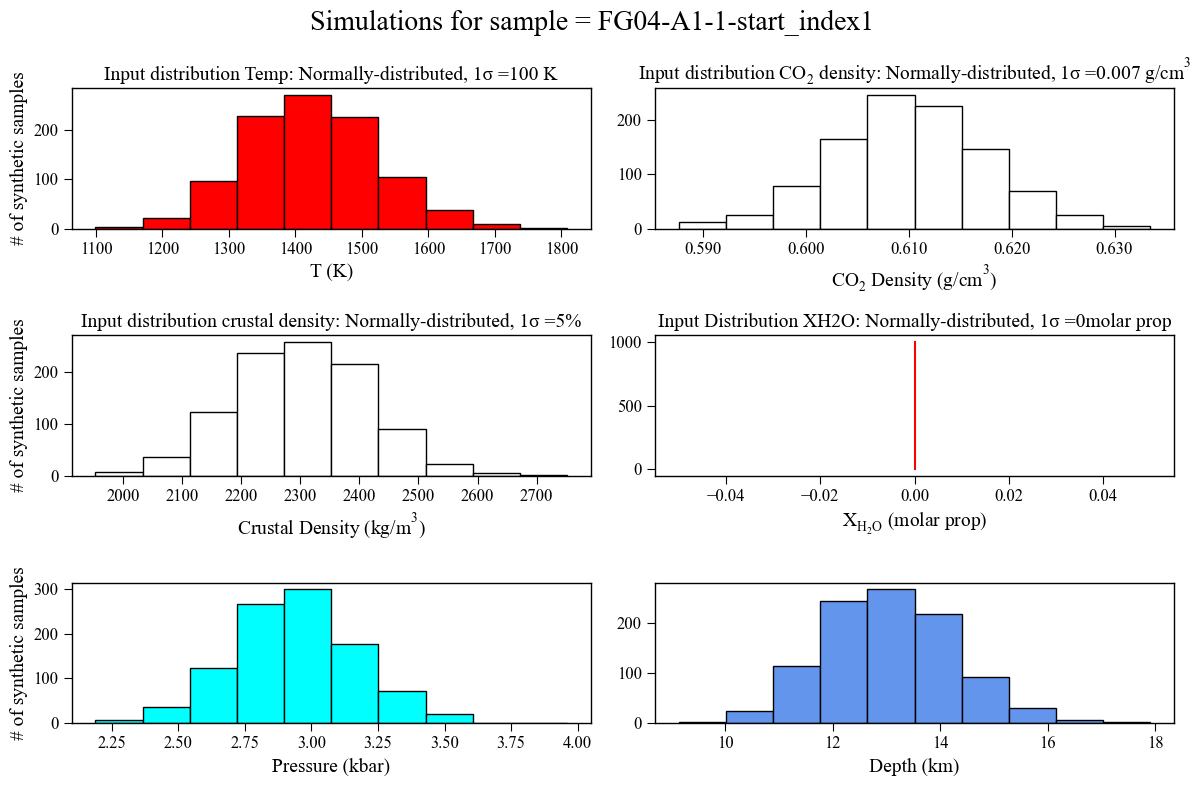

In [108]:
MC_Av_rho_T_CD, MC_All_rho_T_CD, fig=pf.propagate_FI_uncertainty(T_K=1150+273.15,
error_CO2_dens=kl_swrz['σ Density g/cm3'], error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=100, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2300,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=kl_swrz['Density g/cm3'],

sample_ID=kl_swrz['filename_4merge'],
N_dup=1000, fig_i=0, plot_figure=True ,multiprocess=True)
MC_Av_rho_T_CD.head()


You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 200 regardless of what model you selected. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS
We are using multiprocessing based on your selected EOS. You can override this by setting multiprocess=False in the function, but it might slow it down a lot
Number of processors:  8


,Filename,i,CO2_density_input,SingleCalc_D_km,SingleCalc_Press_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,FG04-A1-1-start_index1,0.0,0.609630,NaN,8.926294,3.459980,3.427150,0.372323,0.344821,12.208425,...,1423.15,100.0,0.609630,0.007472,None,5.0,denlinger_lerner,DZ06,0.1,0.05
1,FG04-A1-16_index60,1.0,0.478732,12.140121,3.412496,2.273045,2.249860,0.236059,0.226508,8.374776,...,1423.15,100.0,0.478732,0.004766,None,5.0,denlinger_lerner,DZ06,0.1,0.05
2,FG04-A1-16_index62,2.0,0.480376,7.948790,2.141871,2.285902,2.262585,0.237433,0.227553,8.416735,...,1423.15,100.0,0.480376,0.004752,None,5.0,denlinger_lerner,DZ06,0.1,0.05
3,FG04-A1-16-start_index4,3.0,0.494153,NaN,4.280777,2.395319,2.371306,0.249777,0.237938,8.773610,...,1423.15,100.0,0.494153,0.004861,None,5.0,denlinger_lerner,DZ06,0.1,0.05
4,FG04-A1-2-start_index2,4.0,0.464893,8.683630,2.367577,2.169727,2.154379,0.230879,0.219887,8.037163,...,1423.15,100.0,0.464893,0.009226,None,5.0,denlinger_lerner,DZ06,0.1,0.05


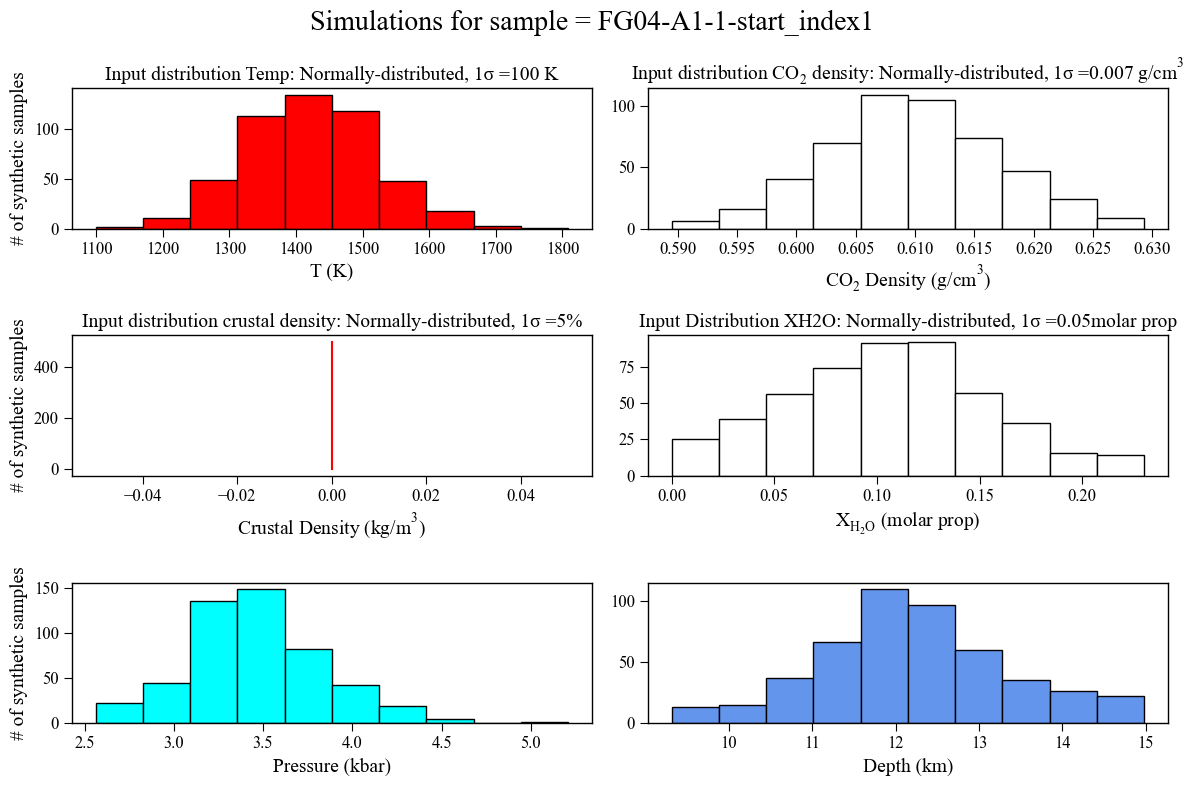

In [109]:

MC_Av_rho_T_CDH, MC_All_rho_T_CDH, fig=pf.propagate_FI_uncertainty(T_K=1150+273.15,
error_CO2_dens=kl_swrz['σ Density g/cm3'], error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=100, error_type_T_K='Abs', error_dist_T_K='normal',
model='denlinger_lerner',
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=kl_swrz['Density g/cm3'],
sample_ID=kl_swrz['filename_4merge'],
XH2O=0.1, error_XH2O=0.05, error_type_XH2O='Abs', error_dist_XH2O='normal',  
N_dup=500, fig_i=0, plot_figure=True )
MC_Av_rho_T_CDH.head()


In [110]:
kl_swrz.reset_index(drop=True, inplace=True)
MC_Av_rho_T_CD.reset_index(drop=True, inplace=True)
MC_Av_rho_T_CDH.reset_index(drop=True, inplace=True)

kl_swrz_PMC=pd.merge(left=kl_swrz,right=MC_Av_rho_T_CD, left_on='filename_4merge',right_on='Filename')
kl_swrz_PMC_XH2O=pd.merge(left=kl_swrz,right=MC_Av_rho_T_CDH, left_on='filename_4merge',right_on='Filename')


In [111]:
kl_swrz_PMC_XH2O[kl_swrz_PMC_XH2O['Mean_MC_D_km']>5]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,FG04-A1-1-start,0.609630,0.007472,0.007085,0.002372,104.165317,0.014482,0.000993,0.014477,6.031,...,1423.15,100.0,0.609630,0.007472,None,5.0,denlinger_lerner,DZ06,0.1,0.05
1,FG04-A1-16,0.478732,0.004766,0.004145,0.002353,103.888961,0.009030,0.001050,0.008988,5.998,...,1423.15,100.0,0.478732,0.004766,None,5.0,denlinger_lerner,DZ06,0.1,0.05
2,FG04-A1-16,0.480376,0.004752,0.004129,0.002353,103.892543,0.008988,0.000580,0.008988,5.998,...,1423.15,100.0,0.480376,0.004752,None,5.0,denlinger_lerner,DZ06,0.1,0.05
3,FG04-A1-16-start,0.494153,0.004861,0.004253,0.002355,103.922437,0.009199,0.000984,0.009164,6.179,...,1423.15,100.0,0.494153,0.004861,None,5.0,denlinger_lerner,DZ06,0.1,0.05
4,FG04-A1-2-start,0.464893,0.009226,0.008921,0.002352,103.858713,0.019563,0.000988,0.019577,6.068,...,1423.15,100.0,0.464893,0.009226,None,5.0,denlinger_lerner,DZ06,0.1,0.05
5,FG04-A1-4,0.678096,0.003284,0.002255,0.002388,104.302894,0.004453,0.001051,0.004337,6.004,...,1423.15,100.0,0.678096,0.003284,None,5.0,denlinger_lerner,DZ06,0.1,0.05
6,FG04-A1-4,0.679868,0.003256,0.002213,0.002388,104.306392,0.004366,0.000581,0.004337,6.004,...,1423.15,100.0,0.679868,0.003256,None,5.0,denlinger_lerner,DZ06,0.1,0.05
7,FG04-A1-4-start,0.687158,0.007217,0.006810,0.002390,104.320752,0.013390,0.000991,0.013380,6.134,...,1423.15,100.0,0.687158,0.007217,None,5.0,denlinger_lerner,DZ06,0.1,0.05
72,FG04-A1-16-end,0.531233,0.009950,0.009666,0.002359,104.001924,0.020536,0.001234,0.020521,6.002,...,1423.15,100.0,0.531233,0.009950,None,5.0,denlinger_lerner,DZ06,0.1,0.05
73,FG04-A1-16_am,0.505333,0.006155,0.005686,0.002356,103.946553,0.012232,0.000880,0.012221,5.949,...,1423.15,100.0,0.505333,0.006155,None,5.0,denlinger_lerner,DZ06,0.1,0.05


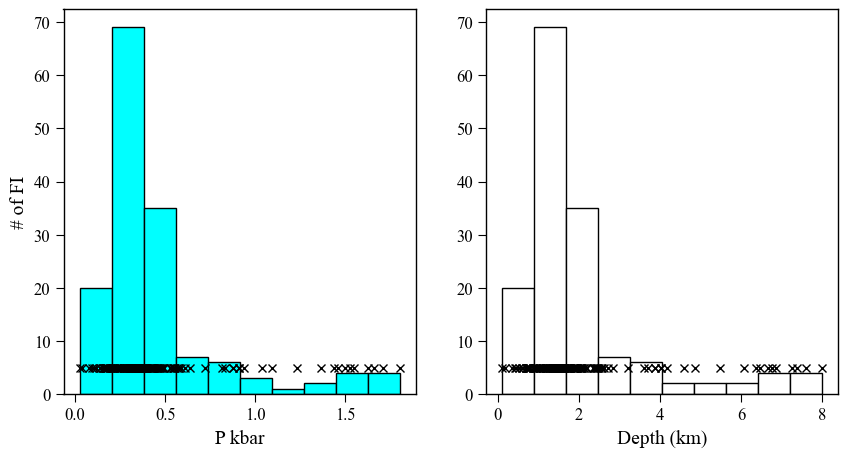

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Filter the data
filtered_data = kl_swrz_PMC[~kl_swrz_PMC['filename'].str.contains('FG')]

# Plotting
ax1.hist(filtered_data['Mean_MC_P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(filtered_data['Mean_MC_P_kbar'], filtered_data['Mean_MC_P_kbar'] * 0 + 5, 'xk')
ax2.plot(filtered_data['Mean_MC_D_km'], filtered_data['Mean_MC_P_kbar'] * 0 + 5, 'xk')
ax2.hist(filtered_data['Mean_MC_D_km'], ec='k', fc='white', bins=10)

# Set labels
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

plt.show()


Text(0, 0.5, 'FI#')

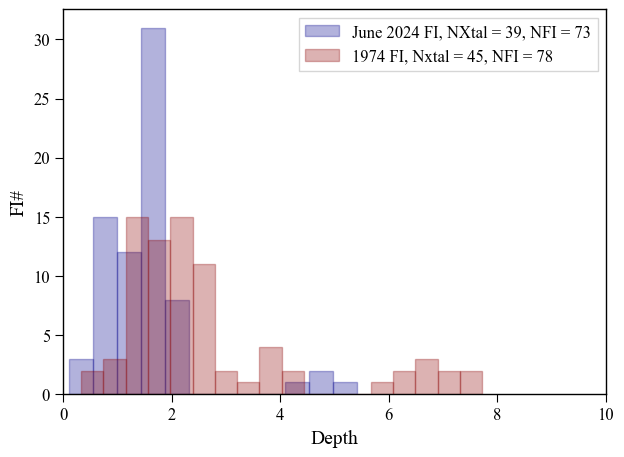

In [117]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7,5))

standards=kl_swrz_PMC_XH2O['filename'].str.contains('FG')
KL_1974=kl_swrz_PMC_XH2O['filename'].str.contains('KL0919|919')
KL_2024=kl_swrz_PMC_XH2O['filename'].str.contains('K24')

ax1.hist(kl_swrz_PMC_XH2O['Mean_MC_D_km'][~(standards)&(KL_2024)], ec='darkblue', fc='darkblue', bins=12,alpha=0.3,label='June 2024 FI, NXtal = 39, NFI = '+str(len(kl_swrz_PMC_XH2O['Mean_MC_D_km'][~(standards)&(KL_2024)])))
ax1.hist(kl_swrz_PMC_XH2O['Mean_MC_D_km'][~(standards)&(KL_1974)], ec='darkred', fc='darkred', bins=18,alpha=0.3,label='1974 FI, Nxtal = 45, NFI = '+str(len(kl_swrz_PMC_XH2O['Mean_MC_D_km'][~(standards)&(KL_1974)])))


ax1.legend()
ax1.set_xlabel('Depth')
ax1.set_xlim([0,10])

ax1.set_ylabel('FI#')

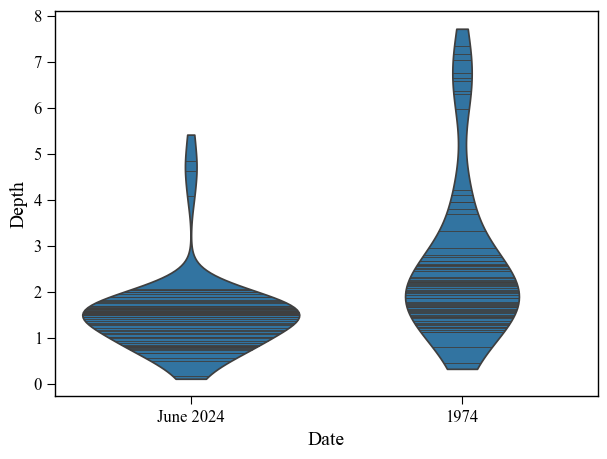

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming kl_swrz_PMC_XH2O is your DataFrame
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))

standards = kl_swrz_PMC_XH2O['filename'].str.contains('FG')
KL_1974 = kl_swrz_PMC_XH2O['filename'].str.contains('KL0919|919')
KL_2024 = kl_swrz_PMC_XH2O['filename'].str.contains('K24')

data1 = kl_swrz_PMC_XH2O.loc[~standards & KL_2024, 'Mean_MC_D_km']
data2 = kl_swrz_PMC_XH2O.loc[~standards & KL_1974, 'Mean_MC_D_km']

# Combine data into a DataFrame with an additional 'Date' column
combined_data = pd.concat([data1, data2], axis=1)
combined_data.columns = ['June 2024', '1974']
combined_data = combined_data.melt(var_name='Date', value_name='Depth')

sns.violinplot(x='Date', y='Depth', data=combined_data, ax=ax1,inner='sticks',cut=0)

ax1.set_xlabel('Date')
ax1.set_ylabel('Depth')

plt.show()



In [ ]:
kl_swrz_PMC_XH2O.to_excel()

In [119]:
kl_swrz_PMC_XH2O.to_excel(compilation_folder+'/'+"KL_SWRZ_wdepths.xlsx")